In [117]:
'''The neccesary packages for our MCMC code'''

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [118]:
'''Calculate the posterior'''
def target(lik, prior, param, theta):
    if theta < 0 or theta > 1:
        return 0
    else:
        return lik(param[0], theta).pmf(param[1])*prior.pdf(theta)

In [119]:
param = 14,10 #our initial data: 14 tries and 10 heads
a = 1 #Params for the beta function
b = 1 

lik = st.binom #Our likelihood
prior = st.beta(a,b) #Our prior
sigma = 0.1 #Standar desviation for the gaussian proposal distribution

naccept = 0. #Accepted steps
theta = 0.05 #Our guest for p

niters = 5000 #How many iterations we want to do
samples = np.zeros(niters+1)
samples[0] = theta

for i in range(niters):
    theta_p = theta + st.norm(0, sigma).rvs() 
    rho = min(1, target(lik, prior, param, theta_p)/target(lik, prior, param, theta))
    u = np.random.uniform()
    '''Metropolis Hasting algorithm'''
    if u < rho: 
        naccept += 1
        theta = theta_p
    samples[i+1] = theta
nmcmc = len(samples)//2
print ("Efficiency = ", naccept/niters)

('Efficiency = ', 0.7406)


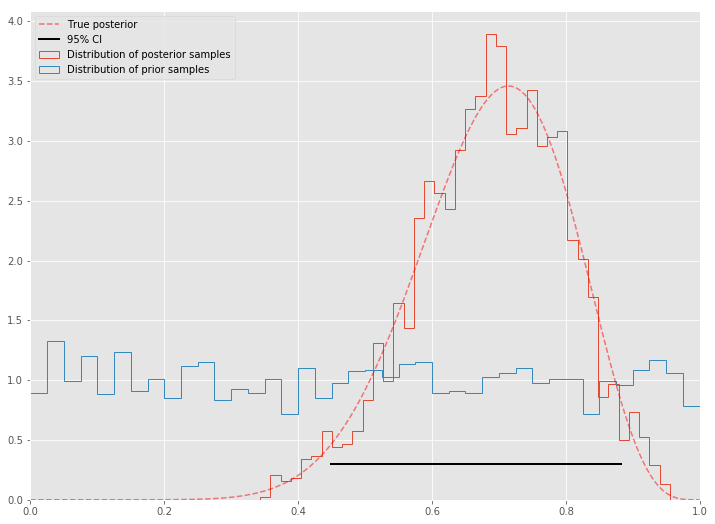

In [120]:
'''We can plot our posterior results'''
thetas = np.linspace(0, 1, 200)
post = st.beta(param[1]+a, param[0]-param[1]+b)
ci = post.interval(0.95) #Our confidence interval

plt.style.use('ggplot') #It is only for the style of the plot
plt.figure(figsize=(12, 9))
plt.hist(samples[nmcmc:], 40, histtype='step', normed=True, linewidth=1, label='Distribution of posterior samples');
plt.hist(prior.rvs(nmcmc), 40, histtype='step', normed=True, linewidth=1, label='Distribution of prior samples');
plt.plot(thetas, post.pdf(thetas), c='red', linestyle='--', alpha=0.5, label='True posterior')
plt.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.xlim([0,1]);
plt.legend(loc='best');
plt.show()

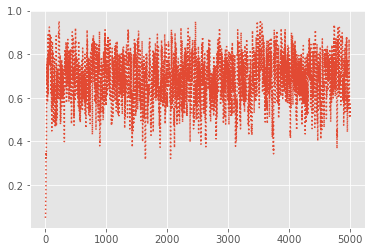

In [121]:
plt.plot(samples, ':')
plt.show()

In [158]:
samples2 = np.zeros(niters+1)
samples2[0] = theta

for i in range(niters):
    theta_p = theta + st.norm(0, 0.002).rvs() 
    rho = min(1, target(lik, prior, param, theta_p)/target(lik, prior, param, theta))
    u = np.random.uniform()
    '''Metropolis Hasting algorithm'''
    if u < rho: 
        naccept += 1
        theta = theta_p
    samples2[i+1] = theta
nmcmc = len(samples2)//2
print ("Efficiency = ", naccept/niters)

('Efficiency = ', 4.2708)


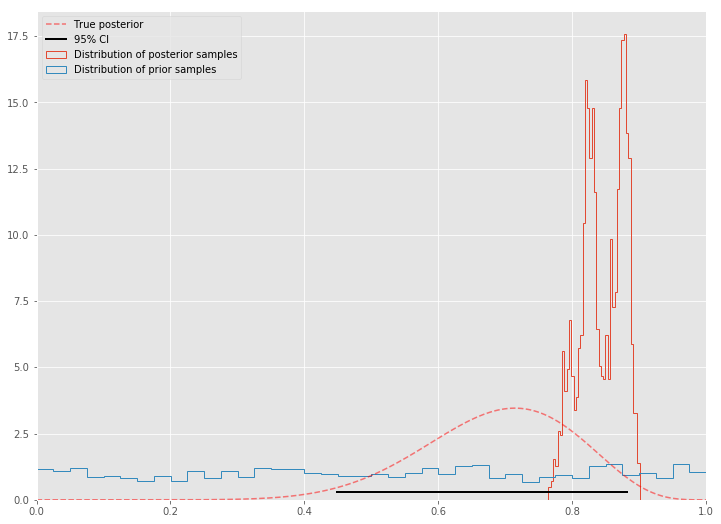

In [159]:
'''We can plot our posterior results'''
thetas2 = np.linspace(0, 1, 200)
post2 = st.beta(param[1]+a, param[0]-param[1]+b)
ci = post.interval(0.95) #Our confidence interval

plt.style.use('ggplot') #It is only for the style of the plot
plt.figure(figsize=(12, 9))
plt.hist(samples2[nmcmc:], 40, histtype='step', normed=True, linewidth=1, label='Distribution of posterior samples');
plt.hist(prior.rvs(nmcmc), 40, histtype='step', normed=True, linewidth=1, label='Distribution of prior samples');
plt.plot(thetas2, post2.pdf(thetas2), c='red', linestyle='--', alpha=0.5, label='True posterior')
plt.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.xlim([0,1]);
plt.legend(loc='best');
plt.show()

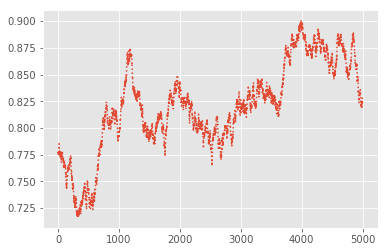

In [160]:
plt.plot(samples2, ':')
plt.show()

In [166]:
samples3 = np.zeros(niters+1)
samples3[0] = theta

for i in range(niters):
    theta_p = theta + st.norm(0, 0.8).rvs() 
    rho = min(1, target(lik, prior, param, theta_p)/target(lik, prior, param, theta))
    u = np.random.uniform()
    '''Metropolis Hasting algorithm'''
    if u < rho: 
        naccept += 1
        theta = theta_p
    samples3[i+1] = theta
nmcmc = len(samples3)//2
print ("Efficiency = ", naccept/niters)

('Efficiency = ', 4.624)


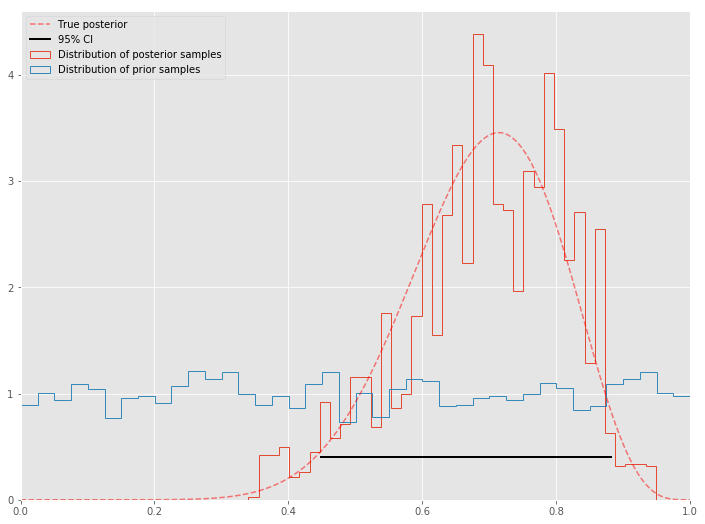

In [167]:
'''We can plot our posterior results'''
thetas3 = np.linspace(0, 1, 200)
post3 = st.beta(param[1]+a, param[0]-param[1]+b)
ci = post.interval(0.95) #Our confidence interval

plt.style.use('ggplot') #It is only for the style of the plot
plt.figure(figsize=(12, 9))
plt.hist(samples3[nmcmc:], 40, histtype='step', normed=True, linewidth=1, label='Distribution of posterior samples');
plt.hist(prior.rvs(nmcmc), 40, histtype='step', normed=True, linewidth=1, label='Distribution of prior samples');
plt.plot(thetas3, post3.pdf(thetas3), c='red', linestyle='--', alpha=0.5, label='True posterior')
plt.axhline(0.4, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.xlim([0,1]);
plt.legend(loc='best');
plt.show()

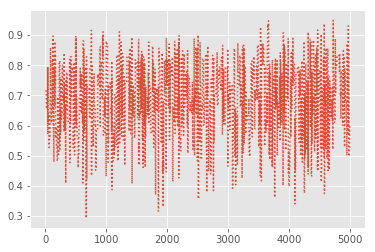

In [168]:
plt.plot(samples3, ':')
plt.show()

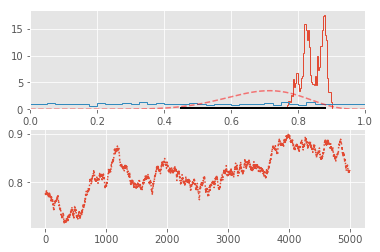

In [169]:
plt.figure(1)
plt.subplot(211)
plt.style.use('ggplot') #It is only for the style of the plot
#plt.figure(figsize=(12, 9))
plt.hist(samples2[nmcmc:], 40, histtype='step', normed=True, linewidth=1, label='Distribution of posterior samples');
plt.hist(prior.rvs(nmcmc), 40, histtype='step', normed=True, linewidth=1, label='Distribution of prior samples');
plt.plot(thetas2, post2.pdf(thetas2), c='red', linestyle='--', alpha=0.5, label='True posterior')
plt.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.xlim([0,1]);
#plt.legend(loc='best');

plt.subplot(212)
plt.plot(samples2, ':')
plt.show()

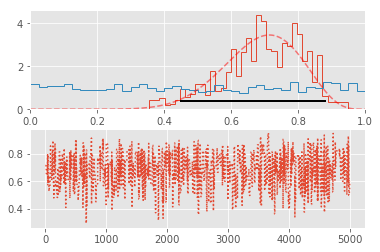

In [170]:
plt.figure(2)
plt.subplot(211)
plt.style.use('ggplot') #It is only for the style of the plot
#plt.figure(figsize=(12, 9))
plt.hist(samples3[nmcmc:], 40, histtype='step', normed=True, linewidth=1, label='Distribution of posterior samples');
plt.hist(prior.rvs(nmcmc), 40, histtype='step', normed=True, linewidth=1, label='Distribution of prior samples');
plt.plot(thetas3, post3.pdf(thetas3), c='red', linestyle='--', alpha=0.5, label='True posterior')
plt.axhline(0.4, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
plt.xlim([0,1]);
#plt.legend(loc='best');

plt.subplot(212)
plt.plot(samples3, ':')
plt.show()

In [ ]:
x